In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN

In [2]:
df = pd.read_csv('encoded-jojo-stands.csv')
df.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Anubis,8,8,2,10,2,6
1,Atum,4,6,4,8,4,4
2,Bastet,2,2,8,10,2,2
3,Cream,8,8,4,6,6,4
4,Death Thirteen,6,6,2,8,4,8


In [3]:
features = df.drop(columns=['Stand'])

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

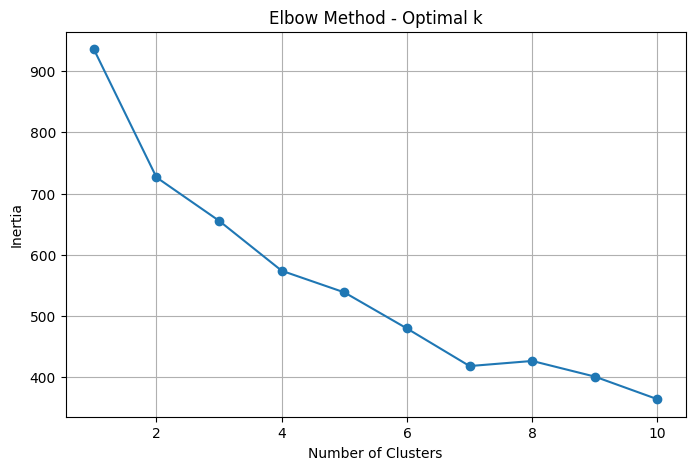

In [6]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Label'] = kmeans.fit_predict(scaled_features)


In [8]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Label'] = dbscan.fit_predict(scaled_features)


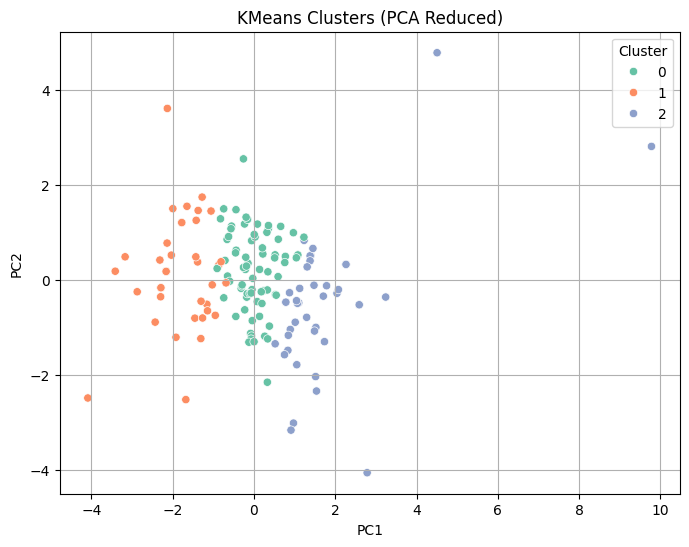

In [9]:
df_pca['Cluster'] = df['KMeans_Label']
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("KMeans Clusters (PCA Reduced)")
plt.grid(True)
plt.show()

In [10]:
df.tail()

,Stand,PWR,SPD,RNG,PER,PRC,DEV,KMeans_Label,DBSCAN_Label
151,Nightbird Flying,2,10,10,10,2,2,0,0
152,Purple Haze Distortion,10,8,2,2,6,10,2,-1
153,Rainy Day Dream Away,2,8,10,10,2,2,0,0
154,Remote Romance,2,4,20,8,6,2,0,-1
155,House of Holy,2,8,6,10,4,4,0,0


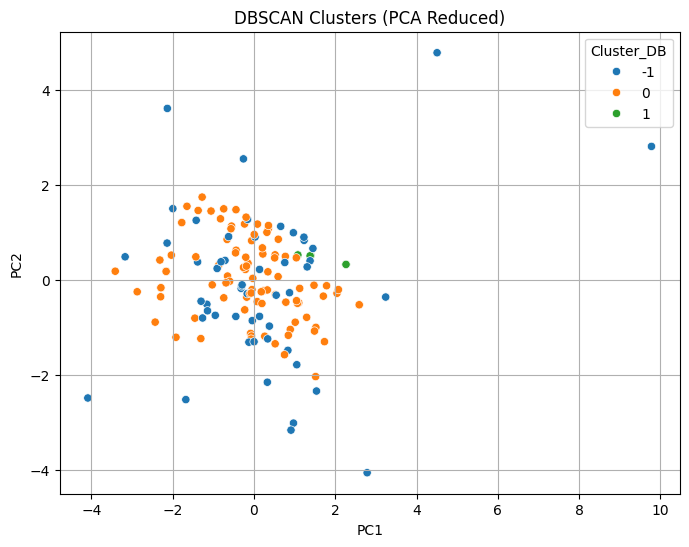

In [11]:
df_pca['Cluster_DB'] = df['DBSCAN_Label']
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_DB', palette='tab10')
plt.title("DBSCAN Clusters (PCA Reduced)")
plt.grid(True)
plt.show()

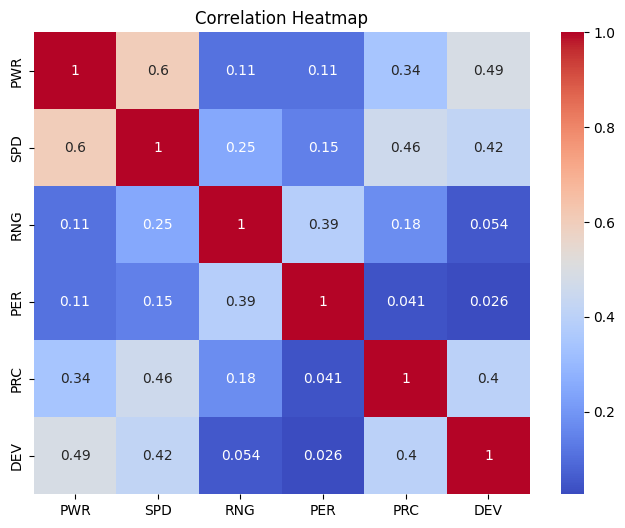

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Stand', 'KMeans_Label', 'DBSCAN_Label']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
selected_stands = df['Stand'].unique()[:5]
df_radar = df[df['Stand'].isin(selected_stands)].set_index('Stand')[['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV']]


In [14]:
df_radar_normalized = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())


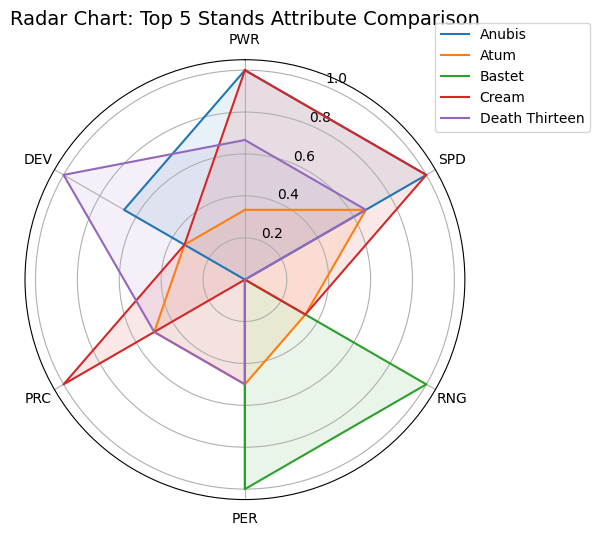

In [16]:
def plot_radar(data,title):
    labels=data.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0,2*np.pi,num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for idx, row in data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
plot_radar(df_radar_normalized, "Radar Chart: Top 5 Stands Attribute Comparison")